
### Here is a brief summary of the first few rows of each dataset:

- Weather.csv
The dataset contains daily weather information such as average temperature, minimum temperature, maximum temperature, precipitation, maximum wind speed, most wind direction, and average relative humidity. It is organized by province and date.

- TimeProvince.csv
This dataset provides daily (time-stamped) COVID-19 status by province, including the number of confirmed cases, released cases, and deaths.

- TimeGender.csv
This dataset contains daily (time-stamped) COVID-19 status broken down by gender, including the number of confirmed cases and deaths.

- TimeAge.csv
This dataset contains daily (time-stamped) COVID-19 status broken down by age group, including the number of confirmed cases and deaths.

- Time.csv
This dataset provides overall daily (time-stamped) COVID-19 status, including the number of tests conducted, negative results, confirmed cases, released cases, and deaths.

- SeoulFloating.csv
This dataset appears to have data on the number of people ("fp_num") in different cities of Seoul, categorized by date, hour, birth year, and sex.

- SearchTrend.csv
This dataset contains daily relative search volume data for terms related to respiratory diseases, including "cold", "flu", "pneumonia", and "coronavirus".

- Region.csv
This dataset provides information about different regions, including the number of schools, kindergartens, universities, the ratio of academies, elderly population ratio, elderly living alone ratio, and the number of nursing homes.

- Policy.csv
This dataset contains information about the different policies implemented by the government, including the type of policy, the specific government policy, details about the policy, and the start and end dates of the policy.

- PatientInfo.csv
This dataset provides information about COVID-19 patients, including their sex, age, country, province, city, infection case, who they were infected by, the number of people they were in contact with, symptom onset date, confirmation date, release date, deceased date, and their current state.

- Case.csv
This dataset provides information about COVID-19 cases, including the province, city, whether the cases were part of a group infection, the specific infection case, the number of confirmed cases, and geographical coordinates.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set the style to whitegrid
sns.set_style("whitegrid")
# set the color palette to viridis
sns.set_palette("viridis")
# File paths
files = {
    'Weather': 'datasets/Weather.csv',
    'TimeProvince': 'datasets/TimeProvince.csv',
    'TimeGender': 'datasets/TimeGender.csv',
    'TimeAge': 'datasets/TimeAge.csv',
    'Time': 'datasets/Time.csv',
    'SeoulFloating': 'datasets/SeoulFloating.csv',
    'SearchTrend': 'datasets/SearchTrend.csv',
    'Region': 'datasets/Region.csv',
    'Policy': 'datasets/Policy.csv',
    'PatientInfo': 'datasets/PatientInfo.csv',
    'Case': 'datasets/Case.csv',
}


# Load the data
data = {file: pd.read_csv(path) for file, path in files.items()}

# Convert the date to datetime format
for df in ['Time', 'TimeProvince', 'TimeGender', 'TimeAge', 'SearchTrend', 'Weather','Policy']:
   if df != "Policy":
        data[df]['date'] = pd.to_datetime(data[df]['date'])
   else:
        data[df]['start_date'] = pd.to_datetime(data[df]['start_date'])
        data[df]['end_date'] = pd.to_datetime(data[df]['end_date'])


### Checking for missing values

In [41]:
# Drop the columns with more than 30% missing values
# we will skip the policy dataFrame as the end_date will be fill with the last date
for key, value in files.items():
    if key != 'Policy':
        threshold = len(data[key]) * 0.3
        cols_to_drop = data[key].columns[(data[key].isna().sum() > 0) & (data[key].isna().sum() > threshold)]
        if len(cols_to_drop) > 0:
            print(key, cols_to_drop)
            data[key].drop(columns=cols_to_drop, inplace=True)


PatientInfo Index(['infected_by', 'contact_number', 'symptom_onset_date', 'released_date',
       'deceased_date'],
      dtype='object')


In [42]:
# threshold of missing values 
# threshold = len(data["PatientInfo"]) * 0.3
# print(threshold)

# # columns with more than 30% missing values 
# cols_to_drop = data["PatientInfo"].columns[(data["PatientInfo"].isna().sum() > 0) & (data["PatientInfo"].isna().sum() > threshold)]
# print(cols_to_drop)

# # Drop the columns with more than 30% missing values
# data['PatientInfo'].drop(columns=cols_to_drop, inplace=True)

### Let's start with the trend of COVID-19 cases over time.

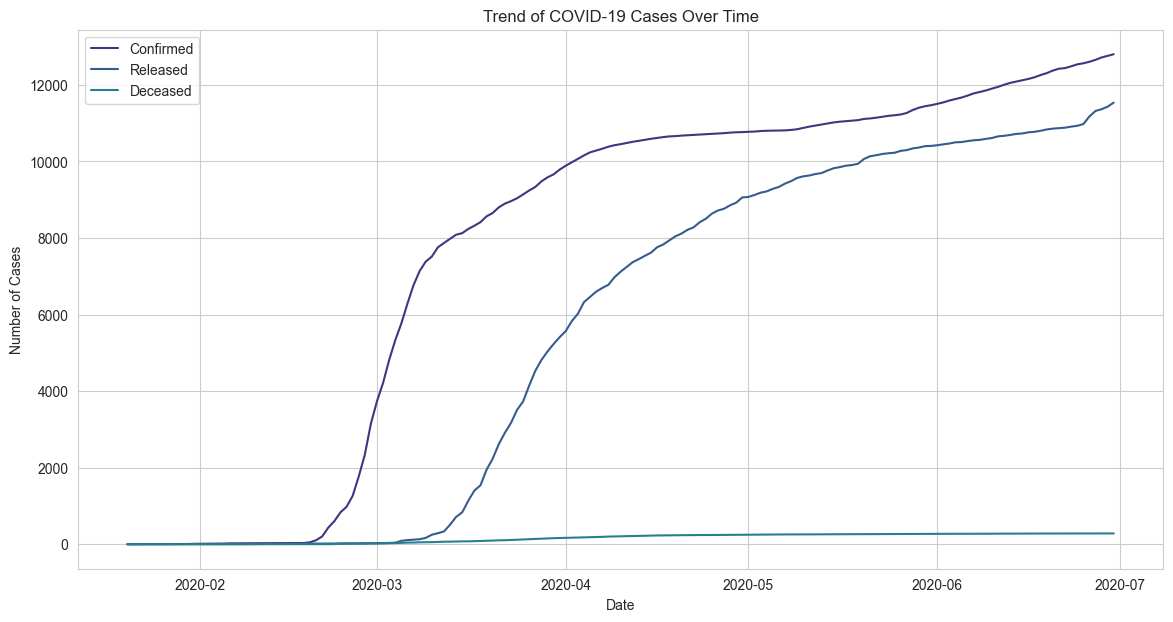

In [43]:
# Plot the trend of confirmed, released, and deceased cases over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='confirmed', data=data['Time'], label='Confirmed')
sns.lineplot(x='date', y='released', data=data['Time'], label='Released')
sns.lineplot(x='date', y='deceased', data=data['Time'], label='Deceased')
plt.title('Trend of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

- The line graph illustrates the trend of confirmed, released, and deceased COVID-19 cases over time. Here are some observations:

- The number of confirmed cases increased sharply in the early stages, which is a common pattern in epidemics due to the exponential growth of cases if not controlled.
- After the peak, the number of confirmed cases appears to have decreased, suggesting that containment measures might have been effective.
- The number of released cases (patients who have recovered from the virus) has been increasing over time, which is a positive sign.
- The number of deceased cases has also increased over time, but at a much slower rate compared to confirmed and released cases.

> Let's look at the distribution of confirmed cases across provinces

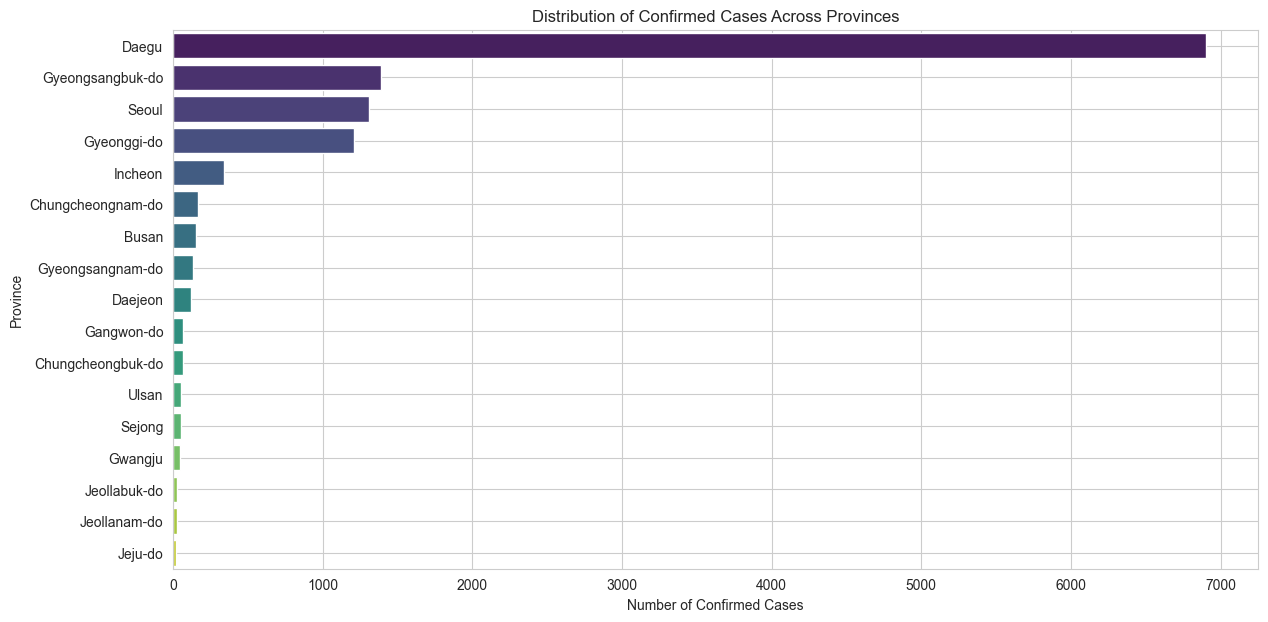

In [44]:
# Group by province and get the latest date for each province (i.e., the latest data)
latest_cases = data['TimeProvince'][data['TimeProvince']['date'] == data['TimeProvince']['date'].max()]

# Plot the distribution of confirmed cases across provinces
plt.figure(figsize=(14, 7))
sns.barplot(x='confirmed', y='province', data=latest_cases.sort_values('confirmed', ascending=False),palette="viridis")
plt.title('Distribution of Confirmed Cases Across Provinces')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Province')
plt.grid(True)
plt.show()

The bar plot shows the distribution of confirmed COVID-19 cases across different provinces as of the latest data available. Here are some observations:

- There is a significant variation in the number of confirmed cases across provinces. Some provinces have many more confirmed cases than others.
- The province with the highest number of confirmed cases appears to be "Gyeongsangbuk-do", followed by "Seoul" and "Gyeonggi-do".

These geographical variations could be due to several factors, such as the size and density of the population in these provinces, their connectivity with other regions, the timing and effectiveness of local prevention measures, and so on.

> Now, let's analyze the distribution of cases by gender and age.



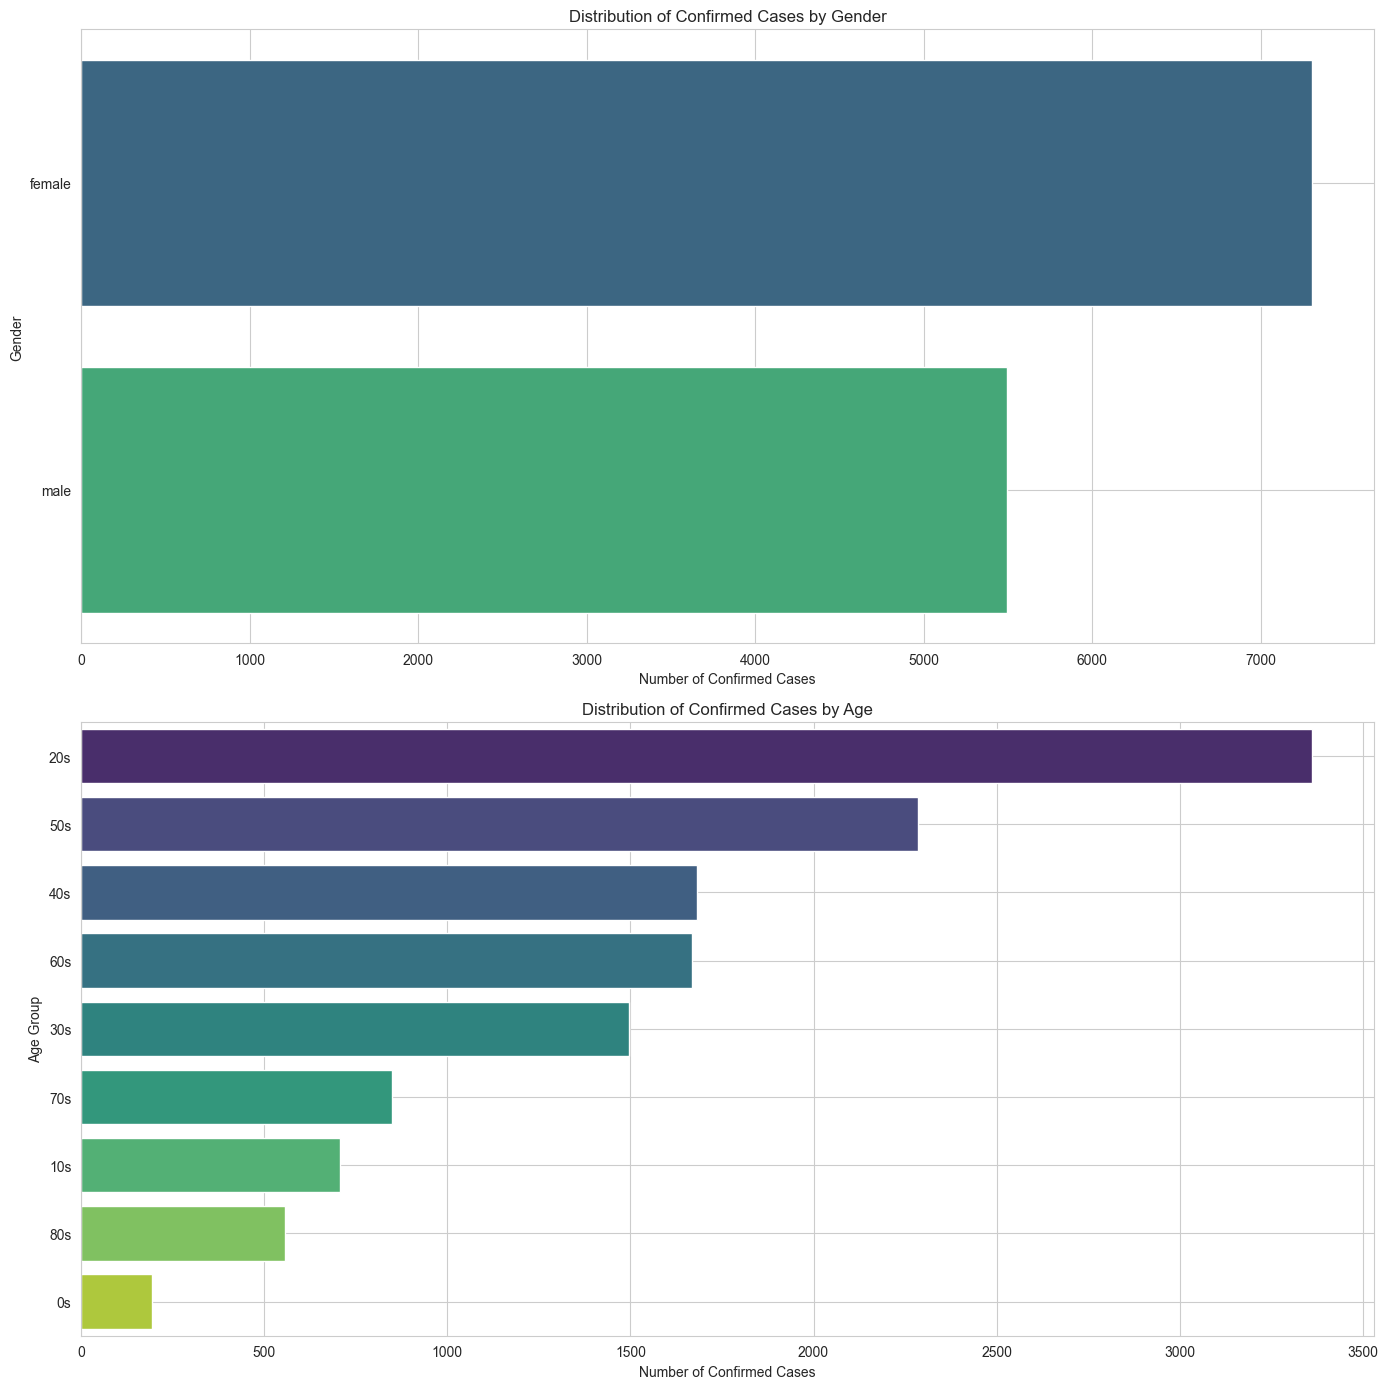

In [45]:
# Get the latest date for each gender and age (i.e., the latest data)
latest_cases_gender = data['TimeGender'][data['TimeGender']['date'] == data['TimeGender']['date'].max()]
latest_cases_age = data['TimeAge'][data['TimeAge']['date'] == data['TimeAge']['date'].max()]

fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Plot the distribution of confirmed cases by gender
sns.barplot(x='confirmed', y='sex', data=latest_cases_gender.sort_values('confirmed', ascending=False), palette="viridis", ax=axs[0])
axs[0].set_title('Distribution of Confirmed Cases by Gender')
axs[0].set_xlabel('Number of Confirmed Cases')
axs[0].set_ylabel('Gender')
axs[0].grid(True)

# Plot the distribution of confirmed cases by age
sns.barplot(x='confirmed', y='age', data=latest_cases_age.sort_values('confirmed', ascending=False), ax=axs[1], palette="viridis")
axs[1].set_title('Distribution of Confirmed Cases by Age')
axs[1].set_xlabel('Number of Confirmed Cases')
axs[1].set_ylabel('Age Group')
axs[1].grid(True)

plt.tight_layout()
plt.show()

The first bar plot shows the distribution of confirmed COVID-19 cases by gender as of the latest data available. Here are some observations:

- The number of confirmed cases is higher in females compared to males.
- The second bar plot shows the distribution of confirmed COVID-19 cases by age group. Here are some observations:

- The number of confirmed cases is highest in the '20s age group, followed by the '50s and '40s age groups.
- The number of confirmed cases is lowest in the '0s (children) and '80s+ age groups.

These patterns can help us understand which demographic groups are most affected and can guide targeted prevention and treatment strategies.

> Now, let's analyze how search interest for COVID-19 and other respiratory illnesses has changed over time.

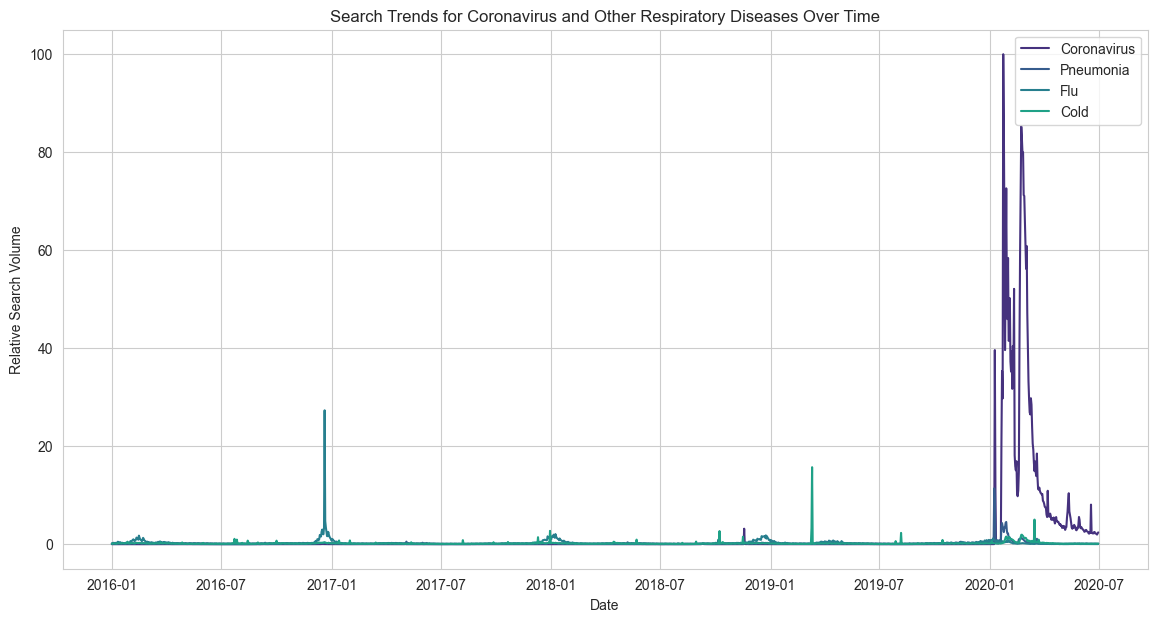

In [46]:
# Plot the search trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='coronavirus', data=data['SearchTrend'], label='Coronavirus')
sns.lineplot(x='date', y='pneumonia', data=data['SearchTrend'], label='Pneumonia')
sns.lineplot(x='date', y='flu', data=data['SearchTrend'], label='Flu')
sns.lineplot(x='date', y='cold', data=data['SearchTrend'], label='Cold')
plt.title('Search Trends for Coronavirus and Other Respiratory Diseases Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Search Volume')
plt.legend()
plt.grid(True)
plt.show()

The line graph illustrates how search interest for COVID-19 and other respiratory illnesses such as pneumonia, flu, and cold has changed over time. Here are some observations:

- The relative search volume for "coronavirus" surged dramatically at a certain point, which corresponds to the start of the pandemic, and then it remained high. This shows the heightened public interest and awareness about the disease. 
  
- The relative search volumes for "pneumonia", "flu", and "cold" show regular seasonal patterns, with peaks during the cold months when these illnesses are more common.

> Now, let's analyze the relationship between the weather and the number of cases.

For this analysis, we'll focus on the 'Seoul' province where the maximum number of cases were reported. We'll consider the 'avg_temp' (average temperature) as the main weather factor for simplicity. More complex models could include other factors like humidity, wind speed, etc.

We'll first merge the 'Weather' and 'TimeProvince' data for the 'Seoul' province and then plot the number of confirmed cases against the average temperature.

In [47]:
# Merge the 'Weather' and 'TimeProvince' data for 'Seoul'
weather_time_seoul = pd.merge(data['Weather'][data['Weather']['province'] == 'Seoul'],
                              data['TimeProvince'][data['TimeProvince']['province'] == 'Seoul'],
                              how='inner', on='date')

In order to correctly visualize the relationship between daily new cases and temperature, we need to calculate the daily new cases first. Let's do that and try the visualization again.

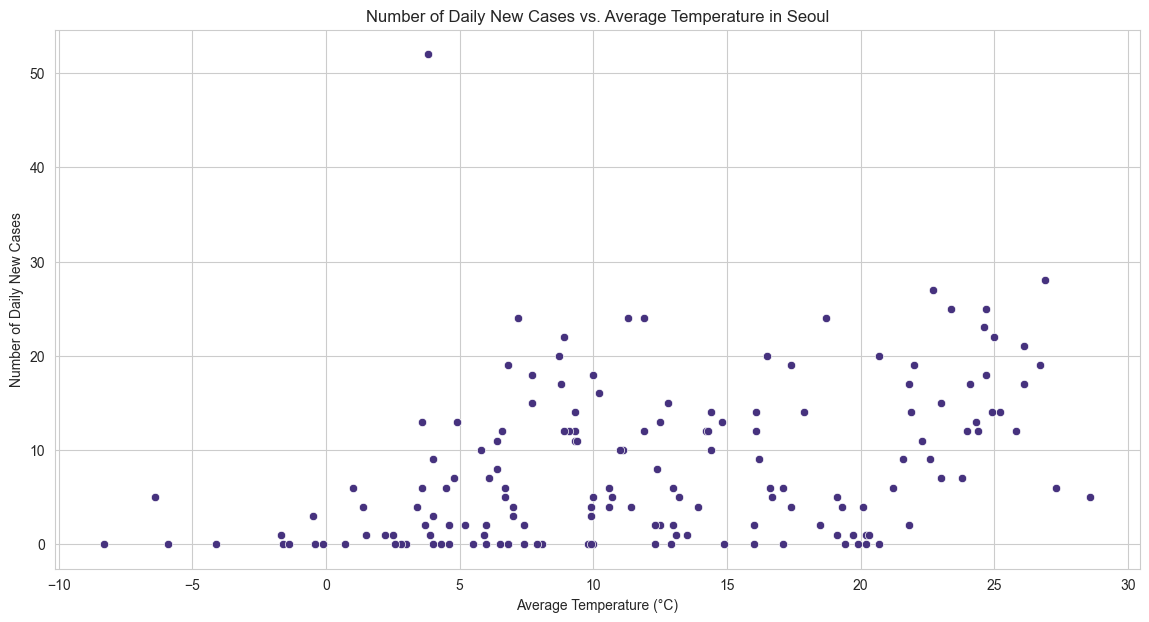

In [48]:
# Calculate the daily new cases
weather_time_seoul['new_cases'] = weather_time_seoul['confirmed'].diff().fillna(weather_time_seoul['confirmed'])

# Plot the number of daily new cases against the average temperature
plt.figure(figsize=(14, 7))
sns.scatterplot(x='avg_temp', y='new_cases', data=weather_time_seoul)
plt.title('Number of Daily New Cases vs. Average Temperature in Seoul')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Daily New Cases')
plt.grid(True)
plt.show()

The scatter plot now shows the number of daily new cases against the average temperature in Seoul. Here are some observations:

- There does not appear to be a clear correlation between the average temperature and the number of daily new cases. This suggests that weather factors like temperature may not have a significant influence on the spread of COVID-19. However, this is a simplified analysis and more complex factors could be at play.

Lastly, let's analyze the effectiveness of different government policies. For this, we'll need to compare the trend of confirmed cases with the start and end dates of different policies.
Lastly, let's analyze the effectiveness of different government policies. For this, we'll need to compare the trend of confirmed cases with the start and end dates of different policies.

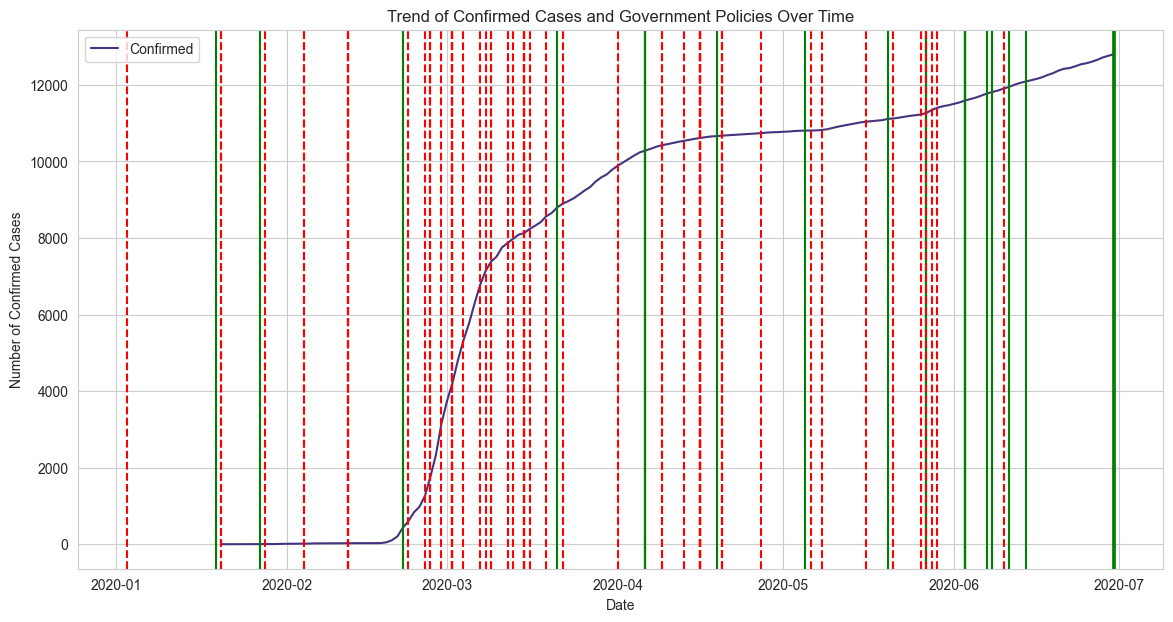

In [49]:
# Fill missing end dates with the last date in the 'Time' data
last_date = data['Time']['date'].max()
data['Policy']['end_date'] = data['Policy']['end_date'].fillna(last_date)

# Plot the trend of confirmed cases over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='confirmed', data=data['Time'], label='Confirmed')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

# Add vertical lines for each policy's start and end date
for _, row in data['Policy'].iterrows():
    plt.axvline(x=row['start_date'], color='red', linestyle='--')
    plt.axvline(x=row['end_date'], color='green', linestyle='-')

plt.title('Trend of Confirmed Cases and Government Policies Over Time')
plt.grid(True)
plt.show()

The line graph illustrates the trend of confirmed COVID-19 cases along with the start (red dashed lines) and end (green dashed lines) dates of different government policies. Here are some observations:

- Several policies were implemented during the early stages of the pandemic, coinciding with the rapid increase in confirmed cases.
  
- Some of these policies seem to have been effective in slowing down the growth of cases, as indicated by the flattening of the curve after their implementation.
  
- Some policies are ongoing as their end dates are the same as the last date in the 'Time' data.

This analysis provides a high-level overview of the timeline of the pandemic and the government's response. However, it's important to note that the effectiveness of individual policies cannot be determined from this plot alone. More detailed analyses would be needed, taking into account other factors and using statistical methods to estimate the impact of each policy.

### PatientInfo Dataset Analysis

The 'PatientInfo' dataset provides detailed information about each COVID-19 patient, such as their age, sex, infection case, and the state of the patient (isolated, released, or deceased). We can analyze this data to gain insights into the demographics of the patients and the infection cases.

In [50]:
# Calculate the number of patients by sex and age
display( data['PatientInfo'].sample(5))
patients_sex_age = data['PatientInfo'].groupby(['sex', 'age']).size().reset_index(name='count')

,patient_id,sex,age,country,province,city,infection_case,confirmed_date,state
1518,1200002936,male,80s,Korea,Daegu,NaN,NaN,2020-02-29,deceased
1462,1100000151,NaN,NaN,Korea,Busan,Dongnae-gu,overseas inflow,2020-06-29,isolated
3252,2000001040,NaN,NaN,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,2020-06-14,isolated
1470,1200000043,female,50s,Korea,Daegu,Dalseo-gu,Shincheonji Church,2020-02-19,isolated
3235,2000001023,NaN,NaN,Korea,Gyeonggi-do,Bucheon-si,contact with patient,2020-06-12,isolated


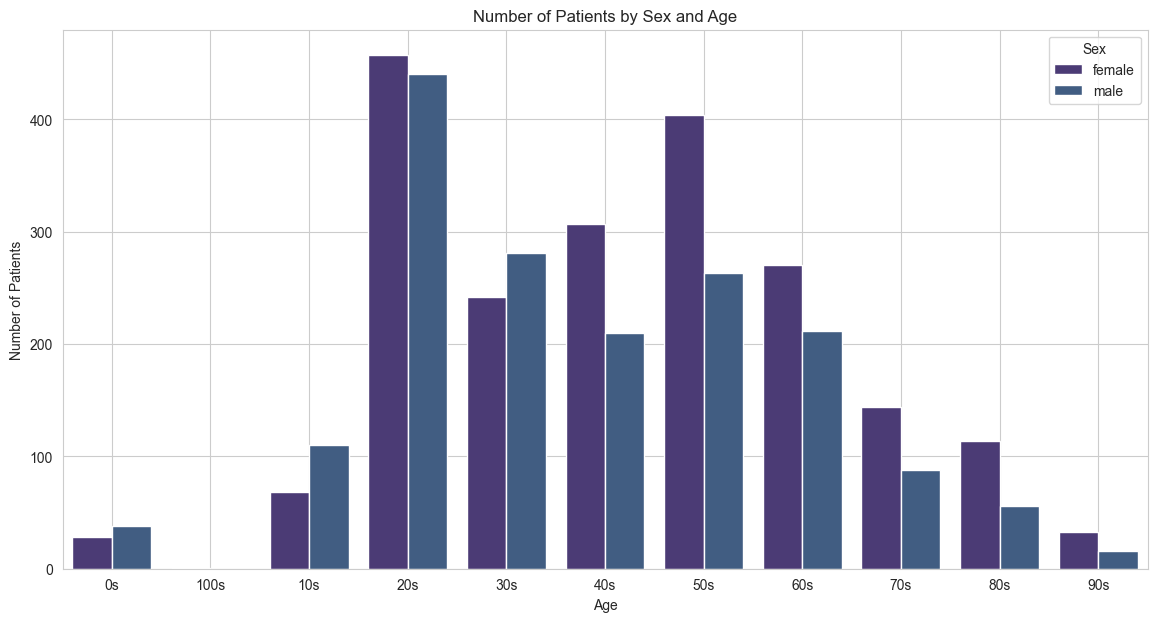

In [51]:
# Plot the number of patients by sex and age
plt.figure(figsize=(14, 7))
sns.barplot(x='age', y='count', hue='sex', data=patients_sex_age)
plt.title('Number of Patients by Sex and Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

In [52]:
# Calculate the number of patients by infection case
patients_infection_case = data['PatientInfo']['infection_case'].value_counts().reset_index()
# print(patients_infection_case)
# patients_infection_case.columns = ['infection_case', 'count']

<Figure size 1400x700 with 0 Axes>

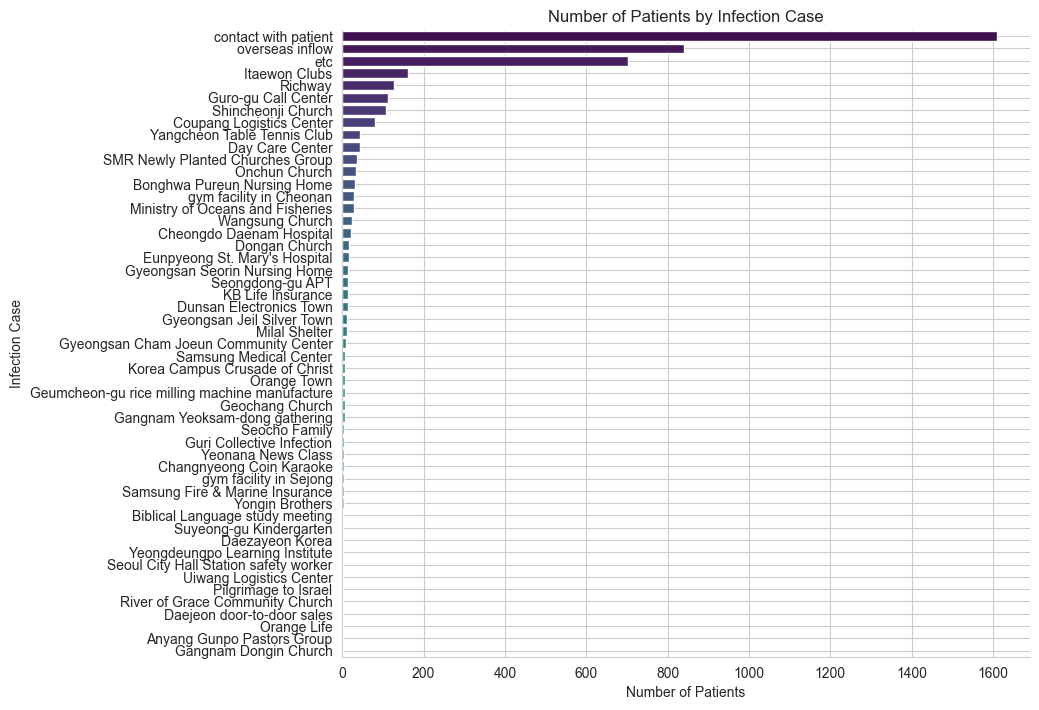

In [53]:
# Plot the number of patients by infection case
plt.figure(figsize=(14, 7))
sns.catplot(x='count', y='infection_case', data=patients_infection_case, kind='bar', palette="viridis", height=7, aspect=1.5)
plt.title('Number of Patients by Infection Case')
plt.xlabel('Number of Patients')
plt.ylabel('Infection Case')
plt.grid(True)
plt.show()

This code calculates the number of patients by sex and age, and by infection case. It then plots the number of patients by sex and age, and by infection case. This can give us an understanding of the demographics of the patients and the common infection cases.

### Case Dataset Analysis

The 'Case' dataset provides information about each COVID-19 case, such as the province, city, and group infection. We can analyze this data to understand the characteristics of each case.

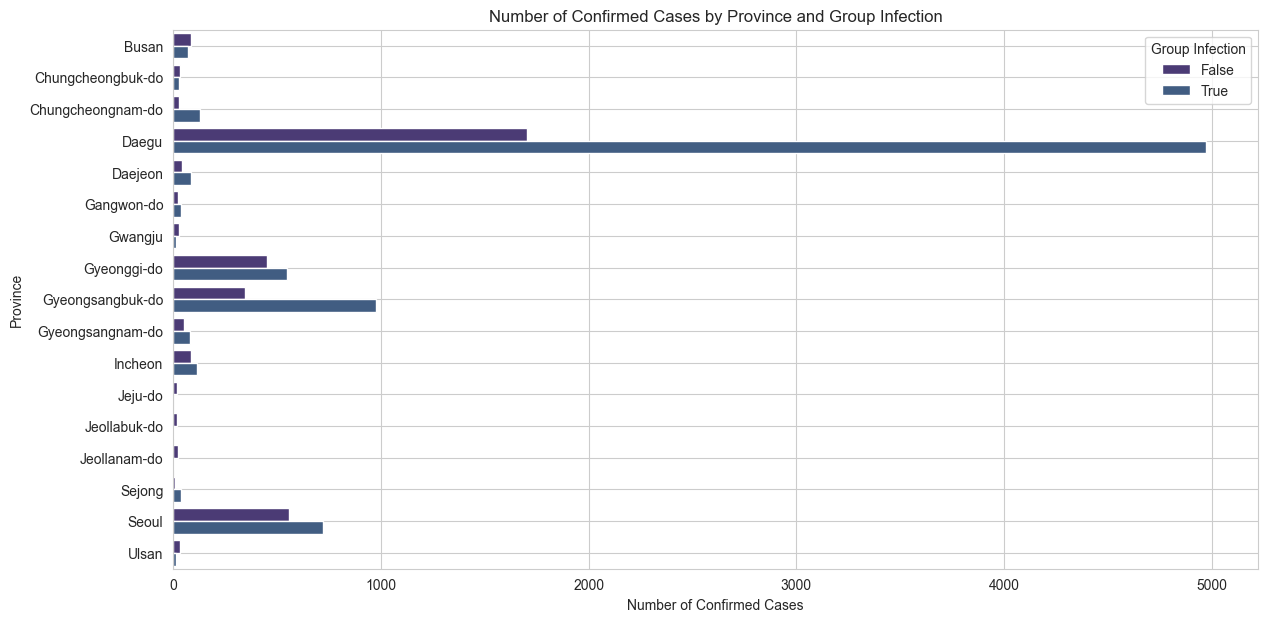

In [54]:
# Calculate the number of confirmed cases by province and group infection
cases_province_group = data['Case'].groupby(['province', 'group']).sum()['confirmed'].reset_index()

# Plot the number of confirmed cases by province and group infection
plt.figure(figsize=(14, 7))
sns.barplot(x='confirmed', y='province', hue='group', data=cases_province_group)
plt.title('Number of Confirmed Cases by Province and Group Infection')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Province')
plt.legend(title='Group Infection')
plt.grid(True)
plt.show()


This code calculates the number of confirmed cases by province and group infection. It then plots the number of confirmed cases by province and group infection. This can give us an understanding of the spread of the virus in different provinces and whether the cases were part of a group infection.

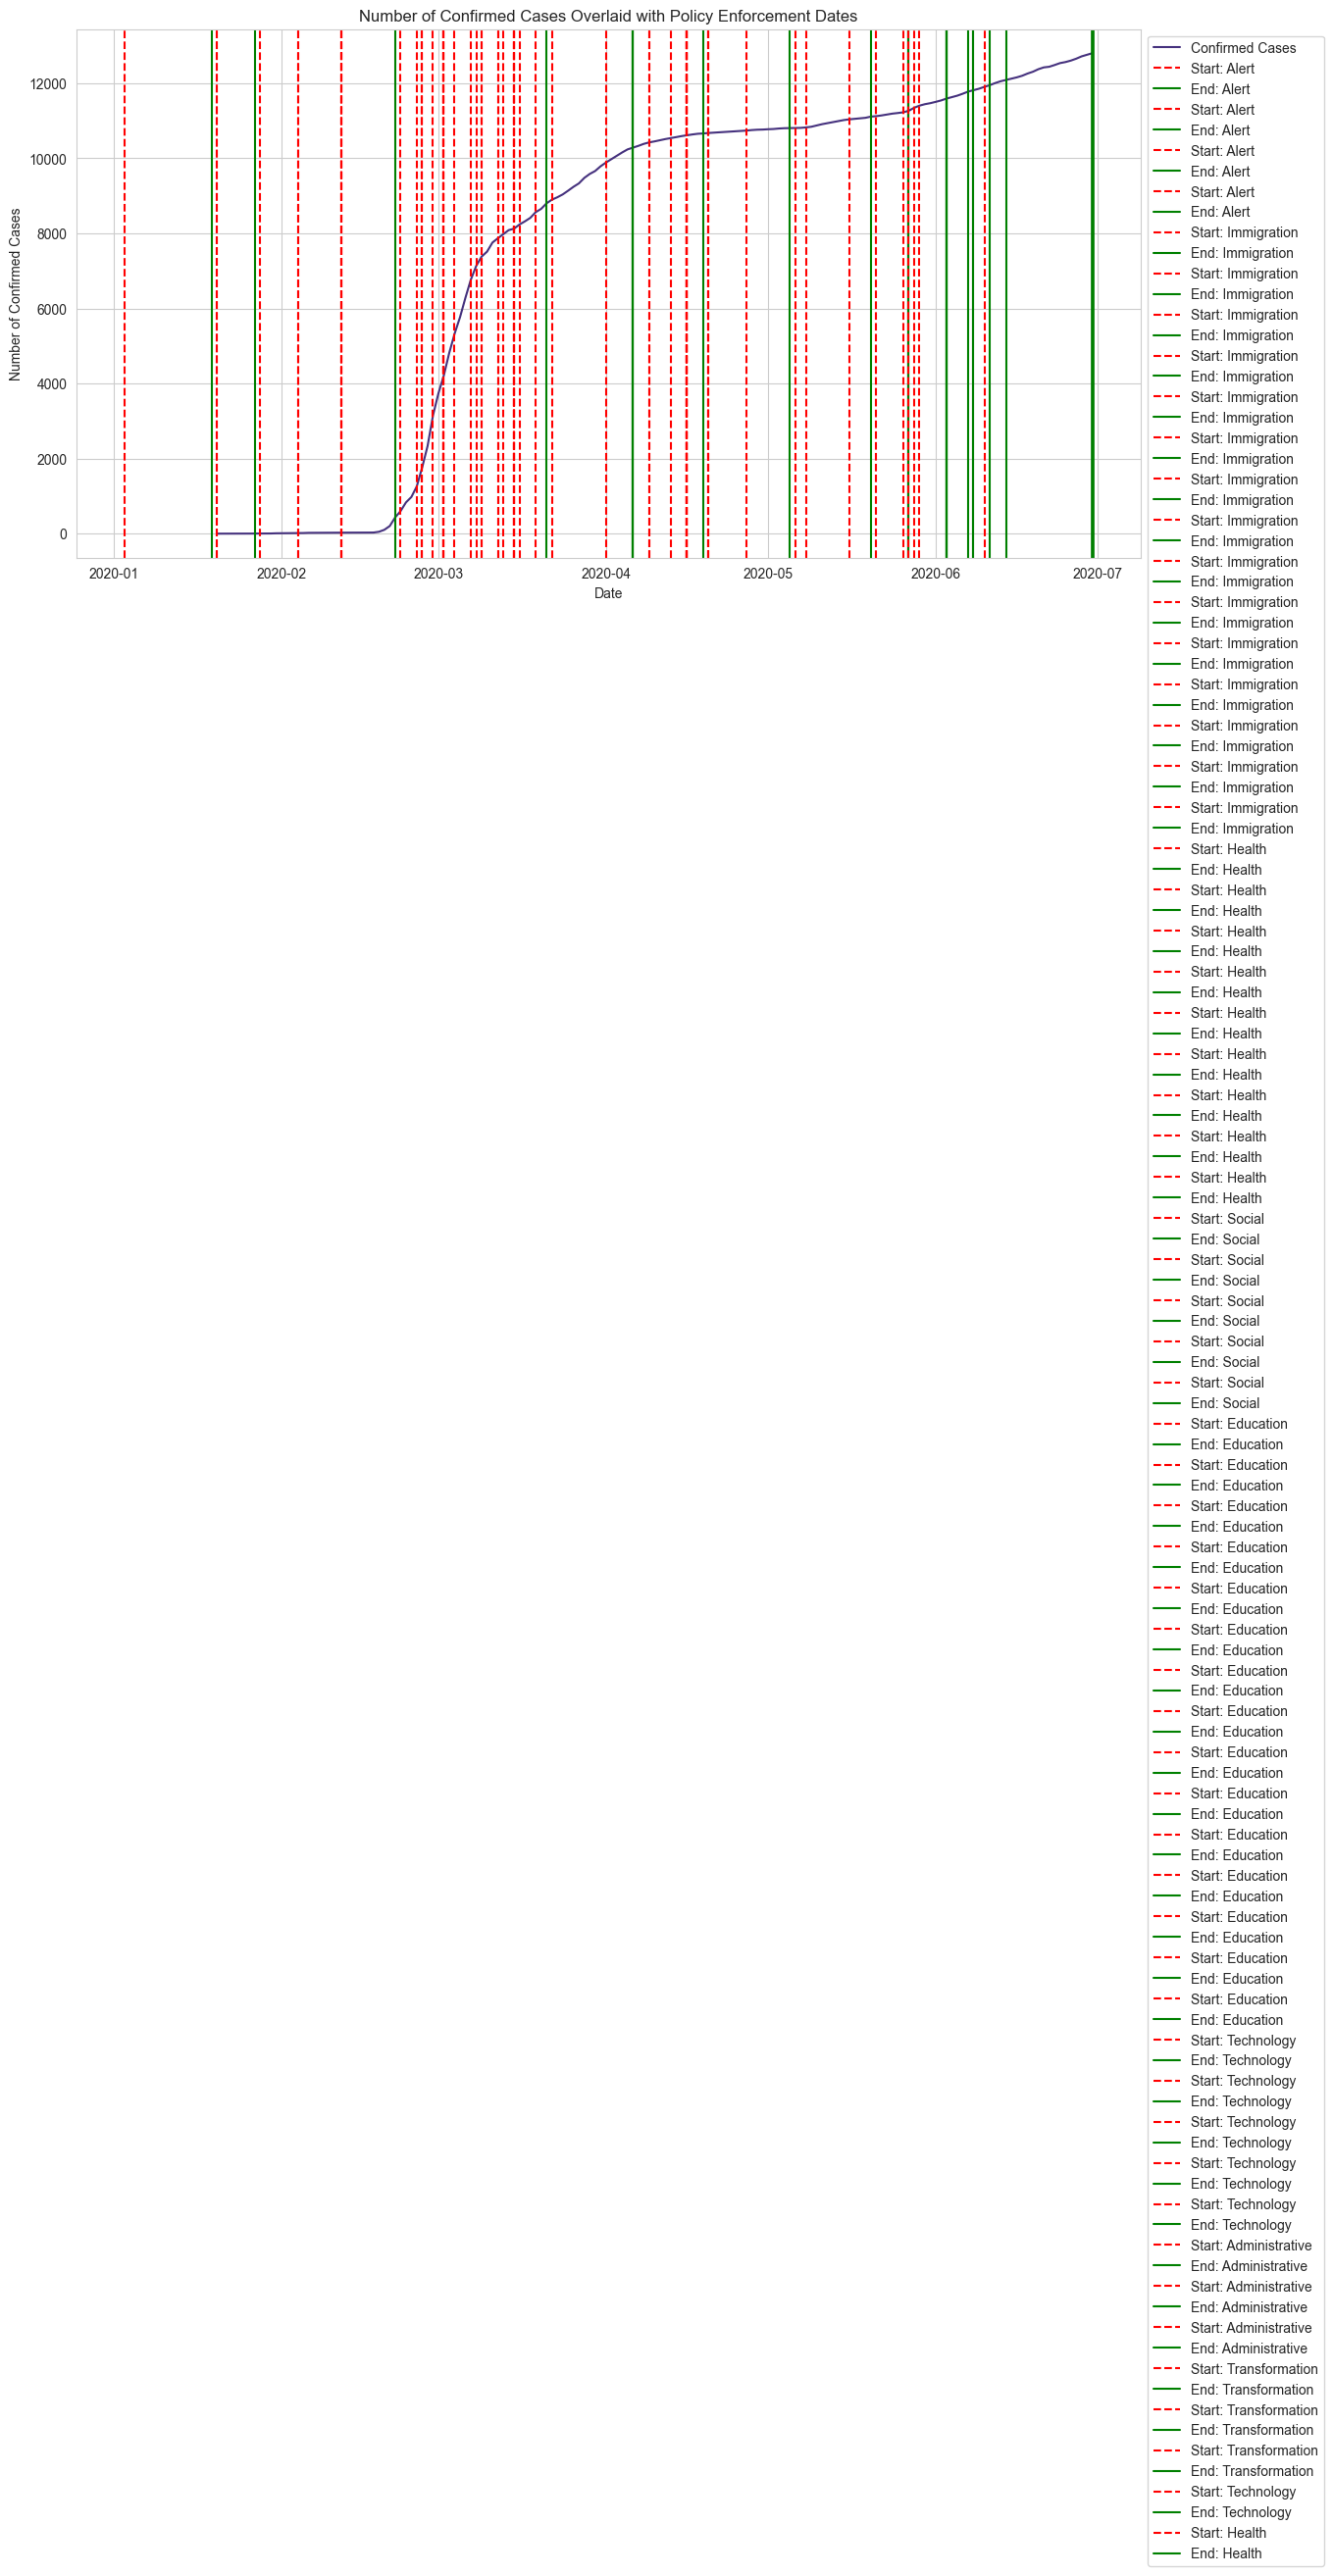

In [55]:
data['Policy']['date'] = data['Policy']['start_date']
# Merge the 'Time' data with 'Policy' data based on dates
merged_data = pd.merge(data['Time'], data['Policy'], how='left', on='date')

# Plot the number of confirmed cases over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='confirmed', data=merged_data, label='Confirmed Cases')

# Overlay the start and end dates of each policy
for _, row in data['Policy'].iterrows():
    plt.axvline(x=row['start_date'], color='red', linestyle='--', label=f"Start: {row['type']}")
    if not pd.isna(row['end_date']):
        plt.axvline(x=row['end_date'], color='green', linestyle='-', label=f"End: {row['type']}")

# Setting title and labels
plt.title('Number of Confirmed Cases Overlaid with Policy Enforcement Dates')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


Looking for correlation between the number of deaths of each province and any other feature of the dataset.

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,deceased
95,20130,Gyeonggi-do,Suwon-si,37.263376,127.028613,99,192,4,1.72,10.50,4.5,2082,23
157,41120,Chungcheongnam-do,Cheonan-si,36.814980,127.113868,75,112,6,1.91,10.42,4.5,1069,0
207,60080,Gyeongsangbuk-do,Bonghwa-gun,36.893099,128.732568,14,17,0,0.37,35.26,20.0,47,54
89,20070,Gyeonggi-do,Gunpo-si,37.361653,126.935206,26,49,1,1.58,12.42,5.4,429,23
175,50140,Jeollabuk-do,Jinan-gun,35.791669,127.424806,13,12,0,0.39,33.80,19.5,54,0
113,20310,Gyeonggi-do,Hwaseong-si,37.199536,126.831330,92,167,6,1.72,8.58,3.3,1001,23
232,61090,Gyeongsangnam-do,Yangsan-si,35.335016,129.037057,37,68,2,1.59,12.92,6.2,507,0
145,41000,Chungcheongnam-do,Chungcheongnam-do,36.658976,126.673318,409,499,21,1.38,18.40,8.9,3641,0
177,51010,Jeollanam-do,Gangjin-gun,34.642006,126.767267,14,14,0,0.79,33.87,21.7,71,0
115,30010,Gangwon-do,Gangneung-si,37.751970,128.875928,34,36,4,1.90,20.46,9.6,347,3


<Figure size 1000x600 with 0 Axes>

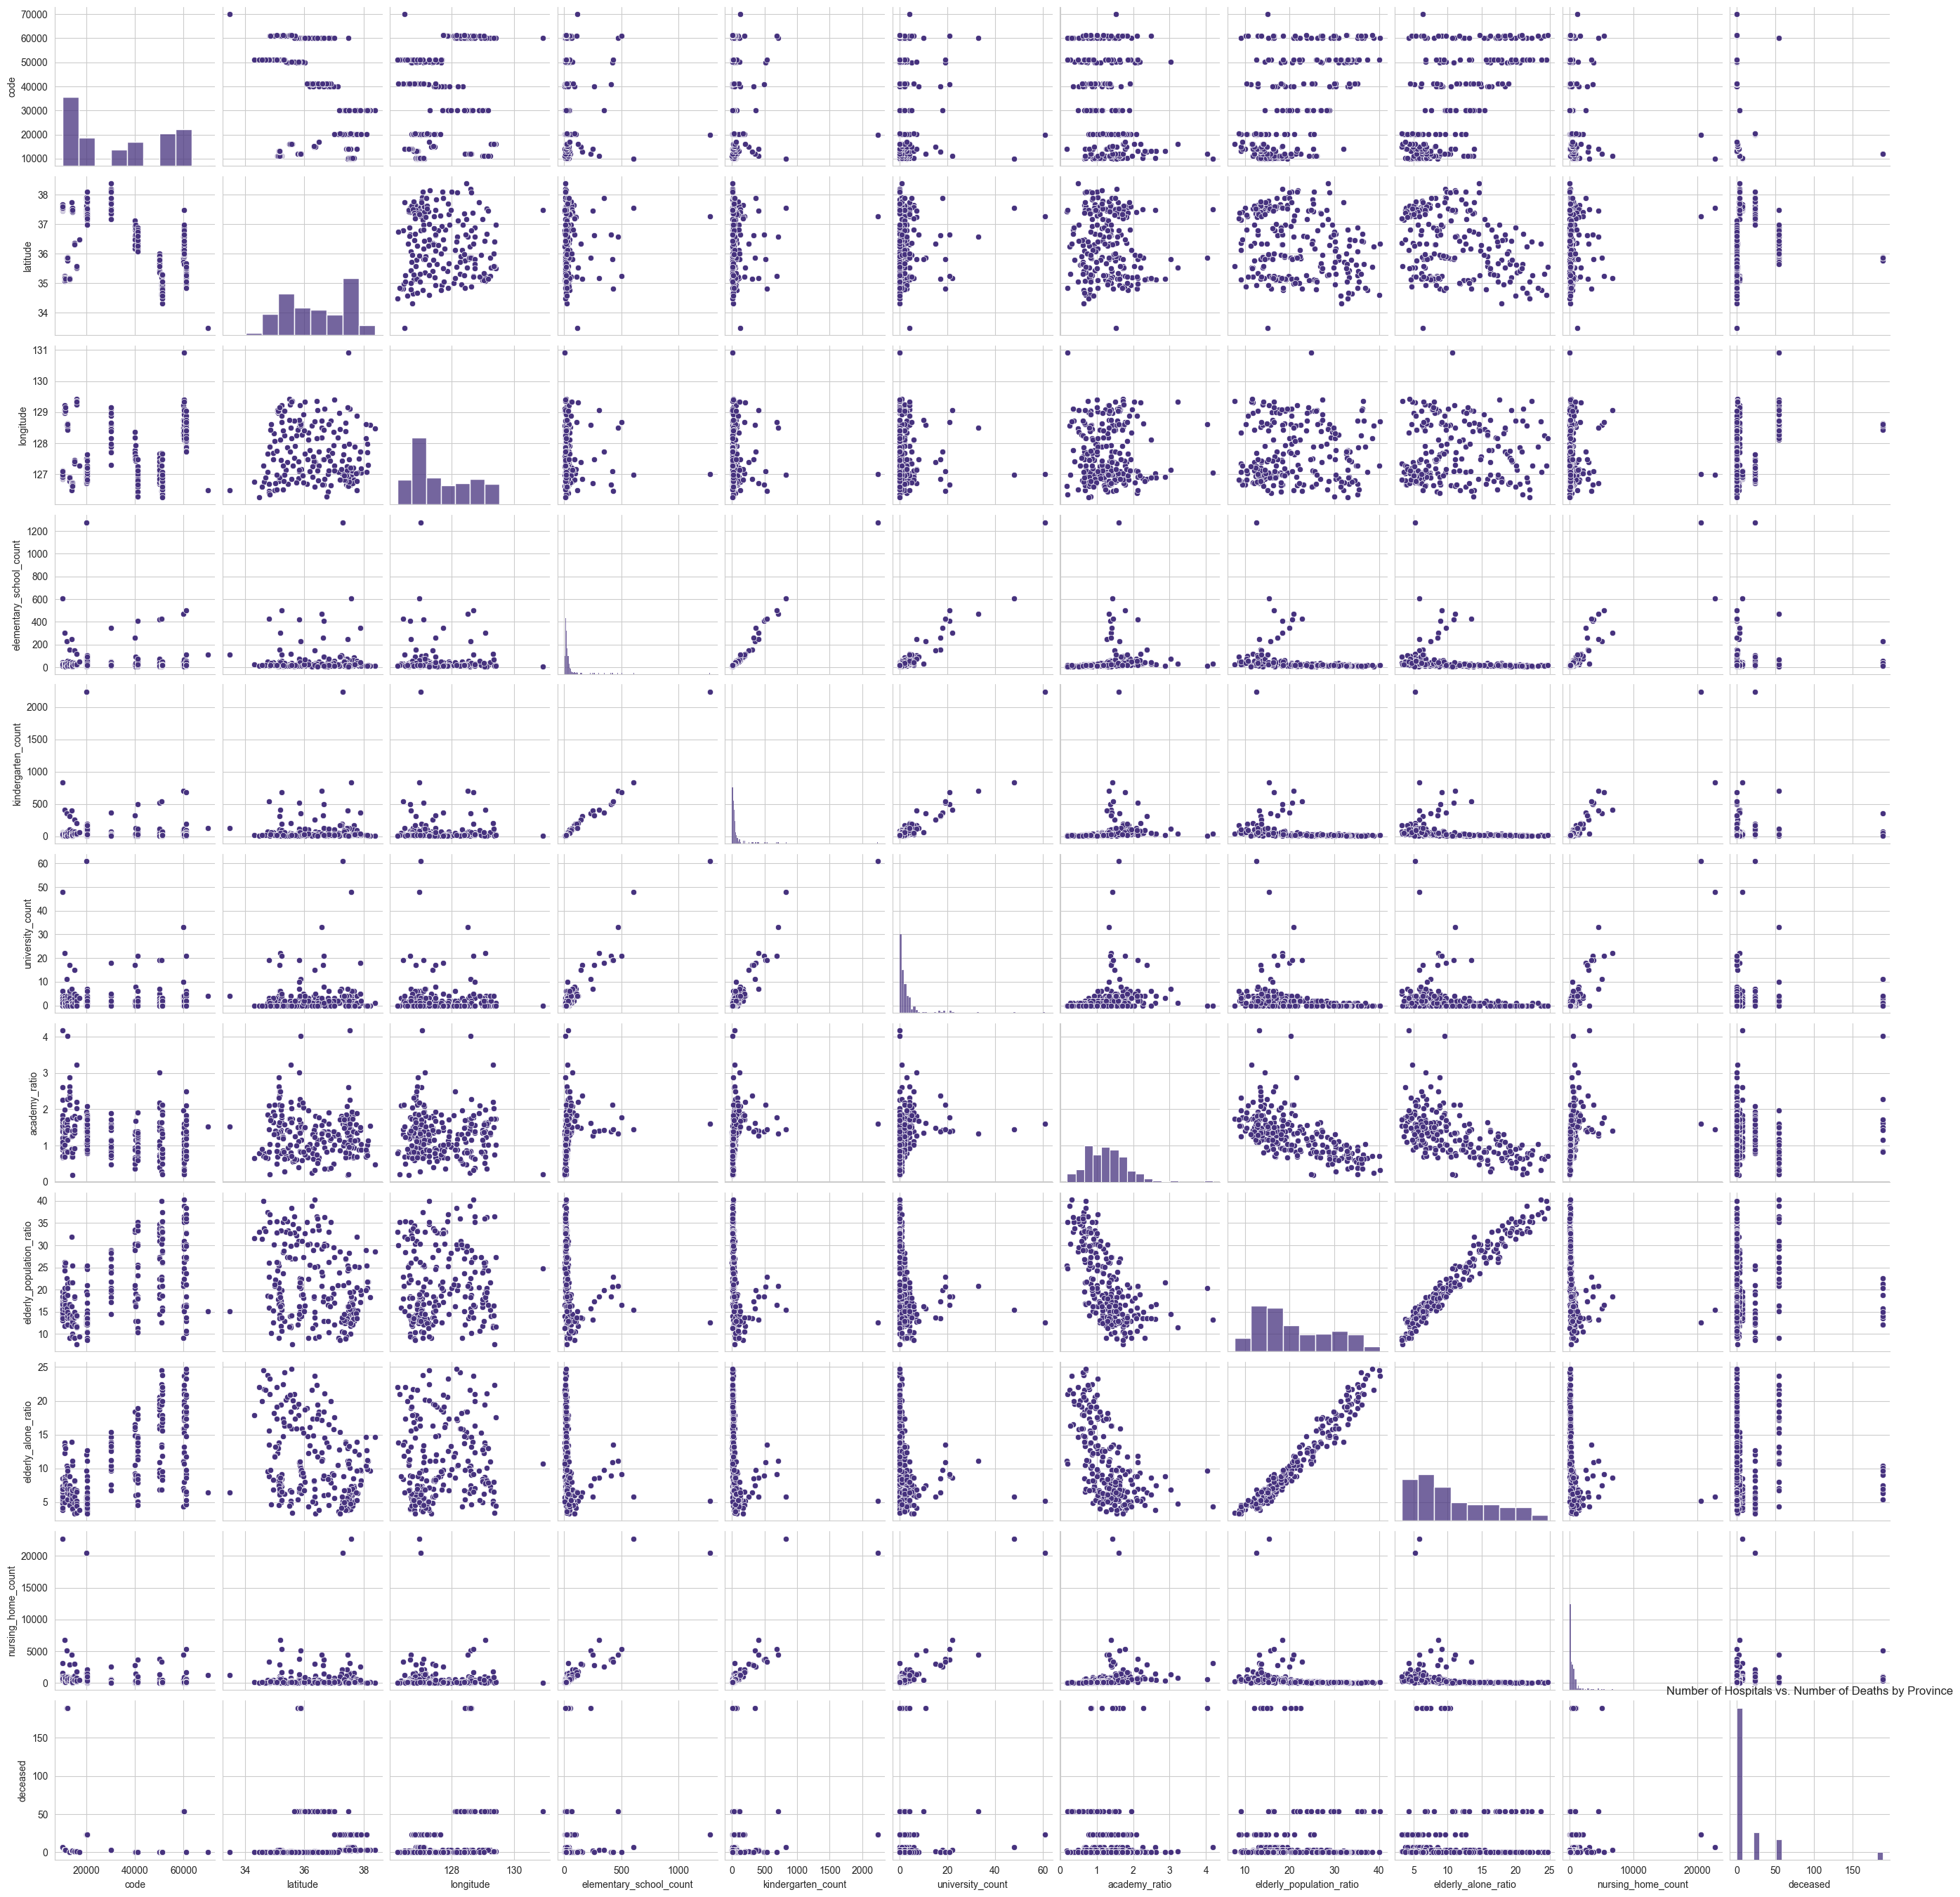

In [56]:
# Aggregate the total number of deaths for each province
province_deaths = data['TimeProvince'].groupby('province').agg({'deceased': 'max'}).reset_index()

# Merge the aggregated data with the 'Region' data
merged_data = pd.merge(data['Region'], province_deaths, on='province')
display(merged_data.sample(10))
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation between healthcare infrastructure and the number of deaths
correlations = numeric_data.corr()['deceased'].drop('deceased')
# print(correlations)

# Plotting
# As an example, visualize the relationship between number of hospitals and number of deaths
plt.figure(figsize=(10, 6))
#sns.scatterplot(x='elderly_population_ratio', y='deceased', data=numeric_data)
sns.pairplot(data=numeric_data)
plt.title('Number of Hospitals vs. Number of Deaths by Province')
plt.xlabel('Number of Hospitals')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()


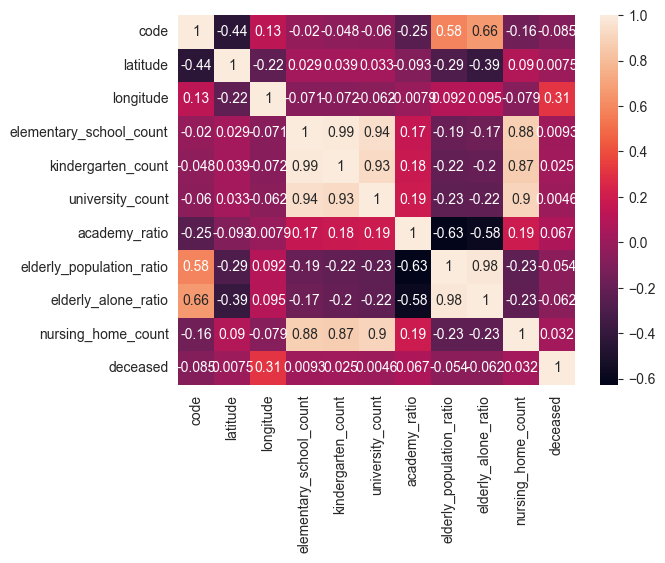

In [57]:
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.show()

It appears that there is no correlation between the number of deaths and any other feature of the dataset.

Looking for Correlation between the population density and the number of case of each province.

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,confirmed
76,16010,35.543833,129.330047,30,44,1,3.23,11.42,4.8,765,55
151,41060,36.333317,126.612679,29,33,1,1.23,25.04,12.6,186,167
221,60220,35.995529,128.401735,21,32,2,1.48,15.17,6.7,151,1389
126,30120,38.146693,127.313400,16,12,0,1.14,21.80,11.1,70,65
15,10150,37.483804,127.032693,24,27,1,2.60,13.39,3.8,1465,1312
123,30090,37.341963,127.919668,50,71,4,1.71,14.46,6.7,597,65
208,60090,36.410977,128.159024,28,35,0,1.03,30.09,17.3,186,1389
176,51000,34.816095,126.463021,429,542,19,1.45,22.81,13.5,3389,24
199,60000,36.576032,128.505599,471,707,33,1.33,20.85,11.1,4474,1389
223,61000,35.238294,128.692397,501,686,21,1.78,16.51,9.1,5364,134


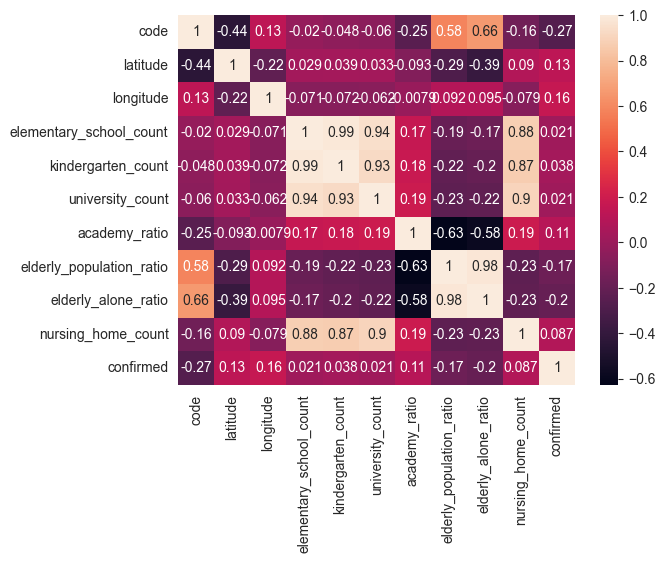

In [58]:
#aggregate the number of confirmed cases by province
province_cases = data['TimeProvince'].groupby('province').agg({'confirmed': 'max'}).reset_index()

#merge the aggregated data with the 'Region' data
merged_data_cases = pd.merge(data['Region'], province_cases, on='province').select_dtypes(include=['float64', 'int64'])
display(merged_data_cases.sample(10))
sns.heatmap(data=merged_data_cases.corr(), annot=True)
plt.show()



Looking for Correlation between the population age and the number of case 

,age,confirmed,median_age
0,0s,193,5
1,10s,708,15
2,20s,3362,25
3,30s,1496,35
4,40s,1681,45
5,50s,2286,55
6,60s,1668,65
7,70s,850,75
8,80s,556,85


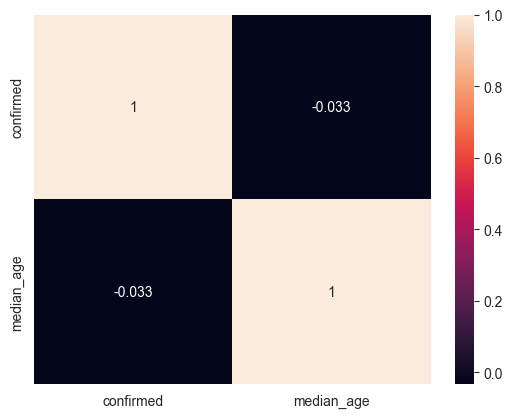

In [71]:
age_cases = data['TimeAge'].groupby('age').agg({'confirmed': 'max'}).reset_index()
#
age_cases['median_age'] = age_cases['age'].replace({
    '0s': 5, '10s': 15, '20s': 25, '30s': 35, '40s': 45,
    '50s': 55, '60s': 65, '70s': 75, '80s': 85, '90s': 95
})

display(age_cases)
numeric_data = age_cases.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.show()


Stripplot and swarmplot of the PatientInfo ages on x axis and infection_case on y axis

,infection_case,patient_id,sex,age,country,province,city,confirmed_date,state
0,Anyang Gunpo Pastors Group,1,0,0,1,1,1,1,1
1,Biblical Language study meeting,3,1,1,3,3,3,3,3
2,Bonghwa Pureun Nursing Home,31,31,31,31,31,31,31,31
3,Changnyeong Coin Karaoke,4,4,4,4,4,4,4,4
4,Cheongdo Daenam Hospital,21,21,21,21,21,21,21,21
5,Coupang Logistics Center,80,56,24,80,80,80,80,80
6,Daejeon door-to-door sales,1,0,0,1,1,1,1,1
7,Daezayeon Korea,3,0,0,3,3,3,3,3
8,Day Care Center,43,0,0,43,43,43,43,43
9,Dongan Church,17,17,17,17,17,17,17,17


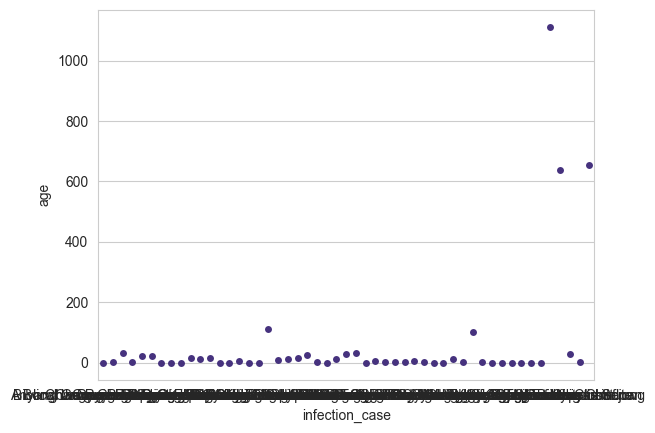

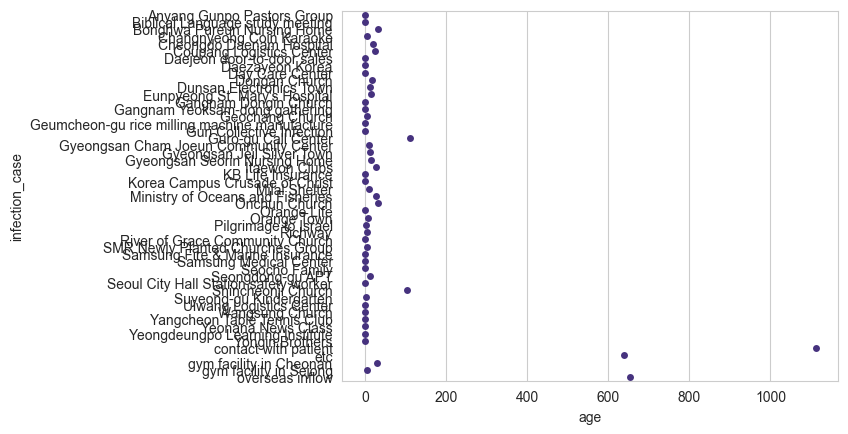

In [93]:
infection_cases = data['PatientInfo'].groupby('infection_case').count().reset_index()
display(infection_cases)
sns.stripplot(data=infection_cases, x='infection_case', y='age', jitter=True)
plt.show()
sns.swarmplot(data=infection_cases, x='age', y='infection_case')
plt.show()

# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

Hint
Variables are defined by vars will be automatically split across the x and y axis.
diag_kind can be used to specify the plot type on the diagonals.
kind can be used to specify the non-diagonal plot types.

# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)
    
plt.show()
plt.clf()